### Step 0: Imports and Reading Data

In [43]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

pl.Config.set_tbl_cols(200)
# pl.Config.set_tbl_rows(-1)

polars.config.Config

In [3]:
df = pl.read_csv("coaster_db.csv")

### Step 1: Data Understanding
* Dataframe shape
* *head* and *tail* 
* dtypes, columns
* describe

In [4]:
df.shape

(1087, 56)

In [ ]:
df.head(5)

In [ ]:
df.schema

In [6]:
print(", ".join(df.columns))

coaster_name, Length, Speed, Location, Status, Opening date, Type, Manufacturer, Height restriction, Model, Height, Inversions, Lift/launch system, Cost, Trains, Park section, Duration, Capacity, G-force, Designer, Max vertical angle, Drop, Soft opening date, Fast Lane available, Replaced, Track layout, Fastrack available, Soft opening date.1, Closing date, Opened, Replaced by, Website, Flash Pass Available, Must transfer from wheelchair, Theme, Single rider line available, Restraint Style, Flash Pass available, Acceleration, Restraints, Name, year_introduced, latitude, longitude, Type_Main, opening_date_clean, speed1, speed2, speed1_value, speed1_unit, speed_mph, height_value, height_unit, height_ft, Inversions_clean, Gforce_clean


In [ ]:
pl.DataFrame({"column": df.columns, "dtype": df.dtypes})

In [ ]:
df.describe()

### Step 2: Data Preperation
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns

In [ ]:
# Filtering out columns that won't be used in the analysis
coaster = df[
    [
        "coaster_name",
        # 'Length', 'Speed',
        "Location",
        "Status",
        # 'Opening date',
        #   'Type',
        "Manufacturer",
        #        'Inversions', 'G-force', # Using the clean data columns for these
        "year_introduced",
        "latitude",
        "longitude",
        "Type_Main",
        "opening_date_clean",
        #'speed1', 'speed2', 'speed1_value', 'speed1_unit', --- taken out due to the main speed_mph column (repetitive information)
        "speed_mph",
        #'height_value', 'height_unit', --- taken out due to the main height_ft column (repetitive information)
        "height_ft",
        "Inversions_clean",
        "Gforce_clean",
    ]
].clone()

In [ ]:
# Changing the opening date data type to -- datetime
coaster = coaster.with_columns(
    pl.col("opening_date_clean")
    .str.to_datetime(strict=False)  # parse to datetime
    .dt.date()  # keep only the date part
    .alias("opening_date_clean")
)

In [ ]:
# Renaming all the columns for consistency
coaster = coaster.rename(
    {
        "coaster_name": "Coaster_Name",
        "year_introduced": "Year_Introduced",
        "opening_date_clean": "Opening_Date",
        "speed_mph": "Speed_mph",
        "height_ft": "Height_ft",
        "Inversions_clean": "Inversions",
        "Gforce_clean": "Gforce",
    }
)

In [ ]:
# Counting nulls per column
coaster.select([pl.col(col).is_null().sum().alias(col) for col in coaster.columns])

Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,213,59,0,275,275,0,250,150,916,0,725


In [ ]:
# Finding duplicated rows (entire row)
coaster.filter(coaster.is_duplicated())

Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
str,str,str,str,i64,f64,f64,str,date,f64,f64,i64,f64


In [ ]:
# Finding duplicated rows based on "Coaster_Name" and show first 5
coaster.filter(coaster.select(pl.col("Coaster_Name")).is_duplicated())

In [ ]:
# Query for a specific roller coaster
coaster.filter(pl.col("Coaster_Name") == "Crystal Beach Cyclone")

In [ ]:
# Drop duplicates based on multiple columns
coaster = coaster.unique(subset=["Coaster_Name", "Location", "Opening_Date"])

### Step 3: Filtering and Grouping
* Dropping irrelevant columns and rows
* Identifying duplicated columns
* Renaming Columns

In [ ]:
# Value counts of "Year_Introduced"
coaster.group_by("Year_Introduced").agg(pl.len()).sort("len")

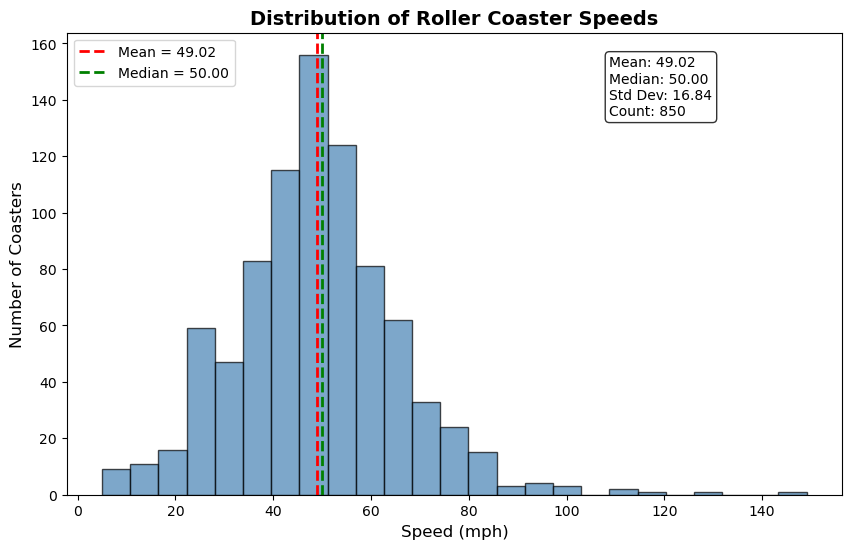

In [42]:
# Drop nulls and convert to numpy
speed_data = coaster.select("Speed_mph").drop_nulls().to_numpy().flatten()

# Summary stats
mean_speed = speed_data.mean()
median_speed = np.median(speed_data)
std_speed = speed_data.std()

# Plot
plt.figure(figsize=(10, 6))
plt.hist(speed_data, bins=25, color="steelblue", edgecolor="black", alpha=0.7)

# Add vertical lines for mean & median
plt.axvline(
    mean_speed,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Mean = {mean_speed:.2f}",
)
plt.axvline(
    median_speed,
    color="green",
    linestyle="dashed",
    linewidth=2,
    label=f"Median = {median_speed:.2f}",
)

# Add annotation box with summary stats
textstr = (
    f"Mean: {mean_speed:.2f}\n"
    f"Median: {median_speed:.2f}\n"
    f"Std Dev: {std_speed:.2f}\n"
    f"Count: {len(speed_data)}"
)

props = dict(boxstyle="round", facecolor="white", alpha=0.8)
plt.gca().text(
    0.70,
    0.95,
    textstr,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=props,
)

# Titles and labels
plt.title("Distribution of Roller Coaster Speeds", fontsize=14, weight="bold")
plt.xlabel("Speed (mph)", fontsize=12)
plt.ylabel("Number of Coasters", fontsize=12)
plt.legend()

plt.show()

In [39]:
# Roller coasters with speeds > 80 mph
coaster.filter(pl.col("Speed_mph") > 80)

Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
str,str,str,str,i64,f64,f64,str,date,f64,f64,i64,f64
"""Superman: Escape from Krypton""","""Other""","""Operating""","""Intamin""",1997,34.425,-118.598,"""Steel""",1997-03-15,100.0,null,0,4.5
"""Leviathan (Canada's Wonderland…","""Canada's Wonderland""","""Operating""","""Bolliger & Mabillard""",2012,43.8445,-79.5424,"""Steel""",2012-05-06,92.0,306.1,0,4.5
"""Kingda Ka""","""Six Flags Great Adventure""","""Operating""","""Intamin""",2005,40.1392,-74.4365,"""Steel""",2005-05-21,128.0,null,0,null
"""Fujiyama (roller coaster)""","""Fuji-Q Highland""","""Operating""","""TOGO""",1996,35.4859,138.777,"""Steel""",1996-07-01,81.0,null,0,3.5
"""Do-Dodonpa""","""Fuji-Q Highland""","""Closed""","""S&S – Sansei Technologies""",2001,35.4877,138.7823,"""Steel""",2001-12-21,111.8,160.8,1,null
…,…,…,…,…,…,…,…,…,…,…,…,…
"""Top Thrill Dragster""","""Cedar Point""","""Closed""","""Intamin""",2003,41.484,-82.6862,"""Steel""",2003-05-04,120.0,null,0,null
"""Hyperion (roller coaster)""","""Energylandia""","""Operating""","""Intamin""",2018,null,null,"""Steel""",2018-07-14,88.2,252.6,1,4.8
"""Furius Baco""","""PortAventura Park""","""Operating""","""Intamin""",2007,41.0847,1.1564,"""Steel""",2007-06-05,83.9,null,1,4.7


In [ ]:
# Top 10 Manufacturers by number of coasters
coaster.group_by("Manufacturer").agg(pl.len().alias("Count")).sort(
    "Count", descending=True
).head(10)

In [ ]:
# Average Speed per Manufacturer
coaster.group_by("Manufacturer").agg(pl.mean("Speed_mph").alias("Avg_Speed")).sort(
    "Avg_Speed", descending=True
).head(10)